![Practicum AI Logo image](images/practicum_ai_logo.png) <img src='images/practicumai_deep_learning.png' alt='Practicum AI: Deep Learning Foundations icon' align='right' width=50>

***
# *Practicum AI:* Deep Learning - MNIST Classifier

This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 2.07, page 92).

## Amelia's AI Adventure Continues...

<img alt="A cartoon of Dr. Amelia's dog looking at a computer with a stack of papers next to it showing some handwritten digits." src="images/Amelias_Dog_MNIST.jpg" padding=20 align="right" width=250>Amelia and her nutrition studies are back! After her adventures with image recognition and binary classification, she's curious to dive deeper. 

While Amelia's data collection process is working for most participants in her study, some do not like using the phone application to submit their survey responses. They keep sending in handwritten responses. Realizing that the data from these study participants is still vital to her research, Dr. Amelia is now looking to automate entering these responses using a program to read the numbers that make up the survey responses.

Again, Amelia decides to start with the basics: recognizing handwritten numbers. That's where the MNIST dataset comes in. With its vast collection of handwritten digits, it's the perfect training ground for Amelia's next AI venture.

**Note:** The cartoon of Dr Amelia's dog was generated with AI's assistance.

Training a model on the MNIST dataset is often considered the "Hello world!" of AI. It is a commonly used first introduction to image recognition with deep learning.


![AI Application Development Pathway model](https://github.com/PracticumAI/deep_learning_2_draft/blob/main/M3-AppDev.00_00_22_23.Still001.png?raw=true)

 >&#128221; While you're going through this notebook, see if you can figure out which steps here are associated with each of the steps of the Development Pathway.

## MNIST Handwritten Digit Classification Dataset

The [MNIST](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) training dataset contains 60,000 28×28 pixel grayscale images of handwritten single digits between 0 and 9, with an additional 10,000 images available for testing. 

The MNIST dataset is frequently used in machine learning research and has become a standard benchmark for image classification models. Top-performing models often achieve a classification accuracy above 99%, with an error rate between 0.4% and 0.2% on the hold-out test dataset.

In this exercise, you will implement a deep neural network (multi-layer) capable of classifying these images of handwritten digits into one of 10 classes. 

Amelia knows that to start any AI project, she'll need the right tools. She begins by importing the necessary libraries to set the stage for her digit-reading neural network.

## 1. Import libraries

Import the necessary libraries.

In [1]:
import tensorflow as tf   # Import the TensorFlow library, which provides tools for machine learning and deep learning.
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt  # Import the matplotlib library for plotting and visualization.
# This line allows for the display of plots directly within the Jupyter notebook interface.
%matplotlib inline  
 
# Import Keras libraries
from tensorflow.keras.models import Sequential  # Import the Sequential model: a linear stack of layers from Keras module in TensorFlow.
from tensorflow.keras.layers import Dense  # Import the Dense layer: a fully connected neural network layer from Keras module in TensorFlow.
from tensorflow.keras.layers import Flatten  # Import the Flatten layer: used to convert input data into a 1D array from Keras module in TensorFlow.

2024-07-23 11:05:50.069037: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 11:05:50.108171: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 11:05:50.108193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 11:05:50.108950: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 11:05:50.114775: I tensorflow/core/platform/cpu_feature_guar

## 2. Load the MNIST dataset

Amelia will need to import the MNIST dataset from the [Keras module](https://keras.io/api/datasets/mnist/). The `train_features` and `test_features` variables contain the training and test images, while `train_labels` and `test_labels` contain the corresponding labels for each item in those datasets.  

```python
# Import the MNIST dataset from TensorFlow's Keras datasets module
mnist = tf.keras.datasets.mnist

# Load the MNIST dataset: 
# - train_features and train_labels are the training images and their corresponding labels.
# - test_features and test_labels are the testing images and their corresponding labels.
(train_features,train_labels), (test_features,test_labels) = mnist.load_data()
```

In [8]:
# Code it!
mnist = tf.keras.datasets.mnist
(train_features,train_labels), (test_features,test_labels) = mnist.load_data()

## 3. Visualize the data

Before we start to work with data, it is always good to get a better idea of what we are working with.

How many images do we have in our training and testing datasets? (Hint, remember the `len()` function.)

In [12]:
# Code it!
len((test_features, test_labels)) + len((train_features, train_labels))

4

Let's have a look at a random image.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  19  34  34  34  58 144 144 144 144  96  78   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 173 253 253 253 253 253 224 253 253 253 244 148  12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 211 253 171  97  44  44  25  44  44  92 254 253  44   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   6  10   2   0   0   0   0   0   0 117 254 180   2   0   0   0   

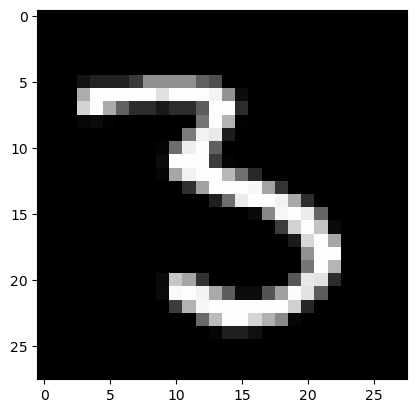

The true label for this image is a 3.


In [13]:
# Set line width for numpy array printing
np.set_printoptions(linewidth=150)

# Select a random number from train_features
select = np.random.randint(0,len(train_features))

# Print the image array - longer line length above should allow it to have all 28 rows in 1 line
print(train_features[select])

# Display the image as an actual image
plt.imshow(train_features[select], cmap='gray')
plt.show()

# Print the true label for the image from train_labels
print(f"The true label for this image is a {train_labels[select]}.")

The ouptut of the cell above should help clarify how images are encoded in our data. Each pixel has a value from 0 (black) to 255 (white). Since our images are black and white, we only have one grid of pixels. For color images, we would have three: one for each color, red, green, blue.

Our datasets have 60,000 images in the `train_features` and 10,000 images in the `test_features`. We will use these data as we move forward.

## 4. Normalize the data

Before we normalize the data, look to see what the current maximum value is in `train_features`.

In [16]:
# Code it! What is the max value of train_features?
train_features.max()

255


Amelia normalizes the data to ensure her AI model can efficiently process these images. Processing your features so that they are represented by numbers between 0 and 1 is a best practice for AI model development.

Normalize the data by scaling the images so their values are between 0 and 1.

```python
# Normalize the pixel values of the training and testing images to be between 0 and 1.
# This is done by dividing each pixel value by 255 (the maximum pixel value for an 8-bit image).
# Normalizing improves the training process and convergence.
train_features, test_features = train_features / 255.0, test_features / 255.0
```

In [17]:
# Code it!
train_features, test_features = train_features / 255.0, test_features / 255.0

Look at the maximum value of `train features` after normalization.

In [18]:
# Code it! After normalization, what is the max value of train_features?
train_features.max()

1.0

## 5. Build the sequential model

Now, the fun part begins! Amelia sets out to build her neural network. In the previous exercises, Amelia called a pre-trained model for image recognition and then built a single-layer network for her binary classifier. With her confidence high, she is going to create this model herself out of multiple layers. This approach gives her (and you!) the most control over the function of the model.

Using the Sequential API, build your model according to the following details:

* First, add a flattened layer to unroll the 28x28 pixel images into a single array of 784. The model should use the input_shape in the function argument to set the input size in the first layer.
* Add a dense hidden layer with 50 units (neurons) and ReLU (Rectified Linear Unit) activation function.
   * The ReLU function will allow the model to capture non-linearities.
* Add a second, dense hidden layer with 20 units and ReLU activation function.
* Add a dense output layer with 10 units and the softmax activation function.
   * We use ten neurons, each representing the digits 0-9. 
   * The softmax function ensures the output values are probabilities that sum to 1, making it suitable for classification.

Here's a graphical view of what we are doing:

![A diagram of the neural network being created. It shows the input 28X28 image being flattened into a 784 dimension array. That is the input. There are two hidden, fully connected layers with 50 and 20 neurons each. The final output layer has 10 neurons for the 10 classes in our model.](images/MNIST_neural_network.png)


Your completed neural network should have four layers. Feel free to experiment with different architectures and build your own model.

```python
# Instantiate a Sequential model, which allows us to build a neural network by stacking layers in a linear fashion.
model = Sequential()

# Add a Flatten layer to the model which transforms a 2D matrix (28x28 pixels) into a 1D array.
# This is necessary because our input images are 28x28 pixels, and we need to flatten them to feed into a dense layer.
model.add(Flatten(input_shape=(28,28)))

# Add a Dense (fully connected) layer with 50 units and a ReLU activation function.
model.add(Dense(units=50, activation='relu'))

# Add another Dense layer with 20 units and a ReLU activation function.
model.add(Dense(units=20, activation='relu'))

# Add a final Dense layer with 10 units and a softmax activation function.
model.add(Dense(units=10, activation='softmax'))
```

In [19]:
# Code it!
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

2024-07-23 11:22:51.659443: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-07-23 11:22:51.659472: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: c0307a-s25.ufhpc
2024-07-23 11:22:51.659477: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: c0307a-s25.ufhpc
2024-07-23 11:22:51.659612: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.104.5
2024-07-23 11:22:51.659625: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 550.54.15
2024-07-23 11:22:51.659629: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 550.54.15 does not match DSO version 535.104.5 -- cannot find working devices in this configuration


## 6. Compile the model

Compiling is the next step. Here, Amelia will specify the parts of the model that are not in the layers, namely the optimizer, loss function, and performance metric.

To `compile` the model, you need to specify an optimizer, a loss function, and a metric to judge your model's performance.

Compile the model with the following specifications:
* `adam` optimizer: An optimization algorithm that adjusts the model weights to minimize the loss.
* `sparse_categorical_crossentropy` loss function: Suitable for classification tasks with integer labels.
* `accuracy` metric: To monitor the accuracy of the model's predictions during training and evaluation.

```python
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

In [20]:
# Code it!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 7. Inspect the model configuration using the summary function

Display a summary of the model's architecture, including the layers, their shapes, and the number of parameters.

```python
model.summary()
```

In [21]:
# Code it!
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 40480 (158.12 KB)
Trainable params: 40480 (158.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model summary indicates that this model has 40,480 parameters (weights and biases). **Note**: If your model summary does not show `Total params: 40480`, double check your model was set up correctly.

## 8. Fit the model to the training data

Now, train the model on the MNIST dataset using the `fit` method. Set the training to run for 10 epochs.

Train the model using the training data:
* `train_features`: the input images
* `train_labels`: the true labels for each image
* `epochs=10`: the number of times the model will cycle through the entire dataset

```python

model.fit(train_features, train_labels, epochs=10)
```

In [22]:
# Code it!
model.fit(train_features, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3309 - accuracy: 0.9038
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1502 - accuracy: 0.9551
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1152 - accuracy: 0.9654
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0949 - accuracy: 0.9711
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0806 - accuracy: 0.9748
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0696 - accuracy: 0.9779
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0607 - accuracy: 0.9809
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0540 - accuracy: 0.9830
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0471 - accuracy: 0.9845
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.042

## 9. Evaluate the model

Finally, evaluate your model's performance on the test set by calling the model's `evaluate()` method.


Evaluate the model's performance using the testing data:
* `test_features`: the input images from the testing set
* `test_labels`: the true labels for each image in the testing set

The `evaluate` method returns the loss value and any additional metrics (in this case, accuracy) for the model on the testing data.

```python
model.evaluate(test_features, test_labels)
```

In [23]:
# Code it!
model.evaluate(test_features, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9749


[0.11952496320009232, 0.9749000072479248]

## 10. Model predictions

Let's see how the model performs on some randomly selected images.  Are its predictions correct?  

Randomly select an image from the test dataset, in this case, the 200th image.

Select a specific image from the test dataset for examination or prediction.

The variable `loc` is set to the index 200, which means we are selecting the 201st image (0-based index) from the test dataset.

```python
loc = 200

# Extract the corresponding image from the test_features array and store it in the 'test_image' variable.
test_image = test_features[loc]
```

In [24]:
# Code it!
loc = 200
test_image = test_features[loc]

First, let's take a look at the shape of the image.

* Get and display the shape (dimensions) of the `test_image` variable.
* This provides insight into the structure and size of the image.

```python
test_image.shape
```

In [25]:
# Code it!
test_image.shape

(28, 28)

We see that our image is 28x28 pixels. However, the model needs not just the size of the image but also the number of channels. A simple call to the `reshape()` method fixes that problem. 

* Reshape the 'test_image' from a 2D array (28x28) to a 3D array (1x28x28).
* This is commonly done to match the input shape that the model expects when making predictions on single samples.

```python
test_image = test_image.reshape(1,28,28)
```

In [26]:
# Code it!
test_image = test_image.reshape(1,28,28)

Now call the model's `predict()` method, assign the output to result, and then view its contents.

* Use the trained model to predict the label for the `test_image`.
* The `predict` method returns an array of probabilities for each possible label (in the case of MNIST, digits 0-9).
* Each value in the array corresponds to the model's predicted probability that the image belongs to a particular class (digit).

```python
result = model.predict(test_image)

# Print the array of probabilities to the console.
print(result)
```

In [27]:
# Code it!
result = model.predict(test_image)

1/1 [==============================] - 0s 58ms/step


As we see, the model has returned the probability of 10 predictions, with the highest one being the most likely.  Use the `argmax` function to see the model's prediction.

* Use the `argmax` method to find the index (label) of the maximum value in the `result` array.
   * This gives us the model's most likely prediction for the class (digit) of the `test_image`.

```python
result.argmax()
```

In [28]:
# Code it!
result.argmax()

3

To verify the prediction, check the label of the corresponding image.


* Using the index loc, retrieve the true label (actual digit) for the `test_image` from the `test_labels` array.
   * This gives us the actual class (digit) of the `test_image` to compare with the model's prediction.

```python
test_labels[loc]
```

In [29]:
# Code it!
test_labels[loc]

3

Finally, visualize the image with pyplot.

* Use the `imshow` function from the `matplotlib` library to display the `test_image` as a visual image.
   * This helps in visually examining the content of the `test_image` (which is represented as a 28x28 array of pixel values).

```python
plt.imshow(test_features[loc])
```

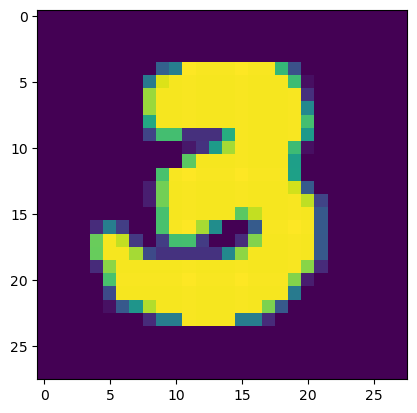

In [30]:
# Code it!
plt.imshow(test_features[loc])

In [32]:
def predict(image, label):
    image.reshape(1, 28, 28)
    result = model.predict(test_image)
    return f"Predicted: {result.argmax()}, Actual: {label}"
    

## Before continuing
###  <img src='images/alert_icon.svg' alt="Alert icon" width=40 align=center> Alert!
> Before continuing to another notebook within the same Jupyter session,
> use the **"Running Terminals and Kernels" tab** (below the File Browser tab) to **shut down this kernel**. 
> This will free up this notebook's GPU memory, making it available for
> your next notebook.
>
> Every time you run multiple notebooks within a Jupyter session with a GPU, this should be done.
>
> ![Screenshot of the Running Terminals and Kernels tab used t oshut down kernels before starting a new notebook](images/stop_kernel.png)

----
## Push changes to GitHub <img src="images/push_to_github.png" alt="Push to GitHub icon" align="right" width=150>

 Remember to **add**, **commit**, and **push** the changes you have made to this notebook to GitHub to keep your repository in sync.

In Jupyter, those are done in the git tab on the left. In Google Colab, use File > Save a copy in GitHub.


## Before continuing
###  <img src='images/alert_icon.svg' alt="Alert icon" width=40 align=center> Alert!
> Before continuing to another notebook within the same Jupyter session,
> use the **"Running Terminals and Kernels" tab** (below the File Browser tab) to **shut down this kernel**. 
> This will free up this notebook's GPU memory, making it available for
> your next notebook.
>
> Every time you run multiple notebooks within a Jupyter session with a GPU, this should be done.
>
> ![Screenshot of the Running Terminals and Kernels tab used t oshut down kernels before starting a new notebook](images/stop_kernel.png)

----
## Push changes to GitHub <img src="images/push_to_github.png" alt="Push to GitHub icon" align="right" width=150>

 Remember to **add**, **commit**, and **push** the changes you have made to this notebook to GitHub to keep your repository in sync.

In Jupyter, those are done in the git tab on the left. In Google Colab, use File > Save a copy in GitHub.
